In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# Download data
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

In [3]:
# Read data
df = pd.read_csv("Data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Select features
cdf = df[["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


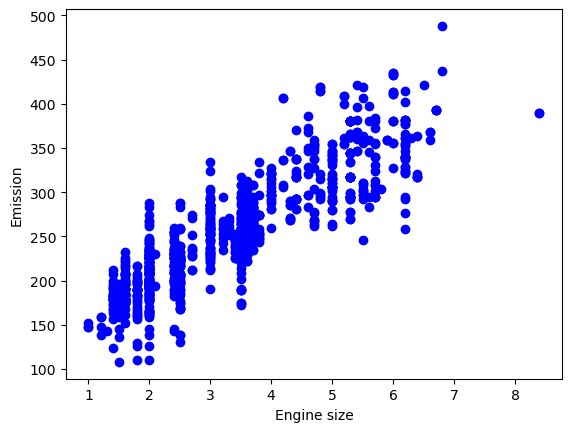

In [5]:
# Plot ENGINESIZE against CO2EMISSIONS
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
# Create train and test data set by using a mask
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [17]:
# Modeling
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Train data set
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

# Test data set
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

# Create polynomial object
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x) # Return transformed array

# Apply multiple linear regression as polynomial regression is a special case of linear regression (input as array)
poly_regr = linear_model.LinearRegression()
poly_regr.fit(train_x_poly, train_y)

# The parameters
print ("Intercept: ", poly_regr.intercept_)
print ("Coefficients: ", poly_regr.coef_)

Intercept:  [109.31910757]
Coefficients:  [[ 0.         48.80814752 -1.24057419]]


Text(0, 0.5, 'Emission')

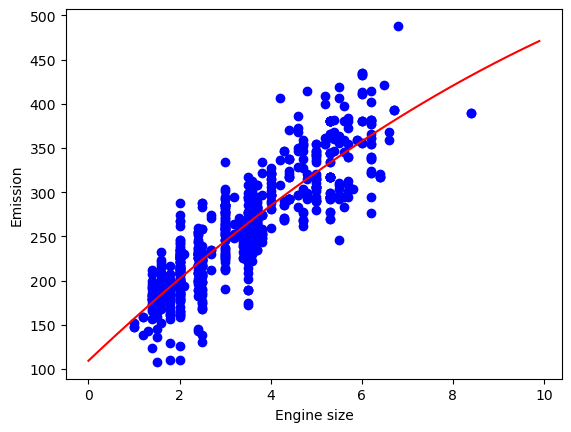

In [32]:
# Plot fit line over data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color="blue")

XX = np.arange(0.0, 10.0, 0.1)
YY = poly_regr.intercept_[0] + poly_regr.coef_[0][1] * XX + poly_regr.coef_[0][2] * np.power(XX, 2)

plt.plot(XX, YY, "r" )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [33]:
# Predict and evaluate model
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
predicted_y = poly_regr.predict(test_x_poly)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(predicted_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, predicted_y))

Mean absolute error (MAE): 24.28
Residual sum of squares (MSE): 1089.36
R2-score: 0.74
